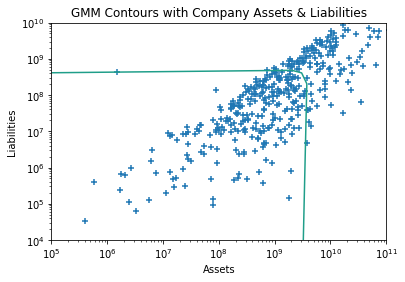

In [2]:
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
import csv
import numpy as np

with open('/Users/peterha/Desktop/Python/ML Final/archive/companies-names-industries.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    namedict = {row[0]: row[1] for row in reader}

with open('/Users/peterha/Desktop/Python/ML Final/archive/latest-snapshot-yearly.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    i = 0
    next(reader)
    name = []
    assets = []
    liabilities = []
    revenues = []
    for row in reader:
        if row[2] == '' or row[7] == '' or row[14] == '':
            continue
        else:
            name.append(namedict[row[0]])
            assets.append(row[2])
            liabilities.append(row[7])
            revenues.append(row[14])

assets = np.asarray([val for ind, val in enumerate(assets) if ind % 10 == 0])
liabilities = np.asarray([val for ind, val in enumerate(liabilities) if ind % 10 == 0])
x = np.asarray([val for ind, val in enumerate(assets) if ind % 20 == 0])
y = np.asarray([val for ind, val in enumerate(liabilities) if ind % 20 == 0])

assets = np.reshape(np.asarray(assets), (-1, 1))
liabilities = np.reshape(np.asarray(liabilities), (-1, 1))
revenues = np.reshape(np.asarray(revenues), (-1, 1))

samples = np.hstack((assets, liabilities))
gmms = []
gmms.append(GaussianMixture(n_components=2, random_state=3).fit(samples))

for i in gmms:
    x = np.linspace(1e5, 1e11)
    y = np.linspace(1e4, 1e10)
    X, Y = np.meshgrid(x, y)
    XX = np.array([X.ravel(), Y.ravel()]).T
    Z = -i.score_samples(XX)
    Z = Z.reshape(X.shape)
    CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                     levels=np.logspace(0, 5, 10))
   # CB = plt.colorbar(CS)
    plt.yscale("log")
    plt.xscale("log")
    plt.scatter(assets.tolist(), liabilities.tolist(), marker="+")
    plt.axis('tight')
    plt.ylim(bottom=1e4, top=1e10)
    plt.xlim(left=1e5, right=1e11)
    plt.xlabel("Assets")
    plt.ylabel("Liabilities")
    plt.title("GMM Contours with Company Assets & Liabilities")
    plt.show()
    #plt.savefig(f"/Users/peterha/Desktop/Python/ML Final/1_components")